In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import os 
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
tf.debugging.set_log_device_placement(True)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px

In [17]:
#Unzip file
from zipfile import ZipFile
import zipfile

#Zipping File
filepath=os.getcwd()
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall(filepath)

In [18]:
data_dir = 'D:\\vscode\\Pistachio Image Dataset\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset'
data_dir = pathlib.Path(data_dir)

In [19]:
Total_images = glob.glob('D:\\vscode\\Pistachio Image Dataset\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\*\*.jpg')
print("Total Number of images",len(Total_images))

Total_images = pd.Series(Total_images)

Total Number of images 2148


In [21]:
my_list = Total_images
for i, element in enumerate(my_list):
    print(f"Index {i}: {element}")

Index 0: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (1).jpg
Index 1: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (10).jpg
Index 2: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (11).jpg
Index 3: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (12).jpg
Index 4: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (13).jpg
Index 5: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (14).jpg
Index 6: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (15).jpg
Index 7: D:\vscode\Pistachio Image Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (1

In [29]:
data_dir = 'D:\\vscode\\Pistachio Image Dataset\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset'

We are splitting the dataset in the following format:

80% Training

10% Validation

10% Test

In [30]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 2148 files [00:01, 1804.52 files/s]


New paths that we will use for Data Augmentation and Displaying Images

In [31]:
train_path = 'D:\\vscode\\Pistachio Image Dataset\\output\\train'
test_path = 'D:\\vscode\\Pistachio Image Dataset\\output\\test'
val_path = 'D:\\vscode\\Pistachio Image Dataset\\output\\val'

Image Preprocessing

In [35]:
img = mpimg.imread('D:\\vscode\\Pistachio Image Dataset\\output\\train\\Kirmizi_Pistachio\\kirmizi (2).jpg')
img1 = mpimg.imread('D:\\vscode\\Pistachio Image Dataset\\output\\train\\Siirt_Pistachio\\siirt (4).jpg')

In [36]:
img.shape, img1.shape

((600, 600, 3), (600, 600, 3))

Our original images have a size of (600,600) so we will be using 512 as the image size to keep the size as a multiple of 64. We could use resizing further but since our dataset is small, we will not be resizing it a lot and using 512 for our purpose.

In [37]:
img_size = 512
batch = 32

In [39]:
labels = []
for i in os.listdir(train_path):
    labels += [i]

In [40]:
labels

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [42]:
import random
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)

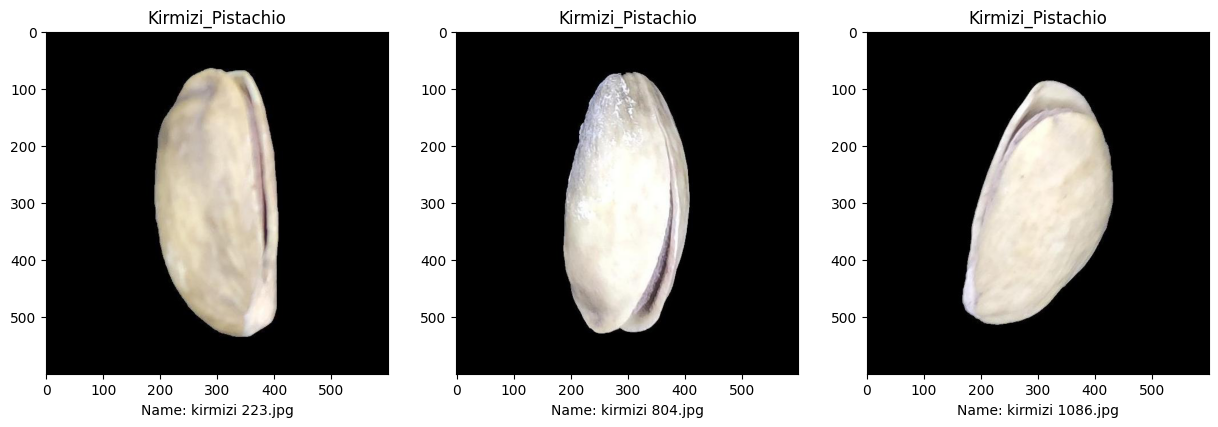

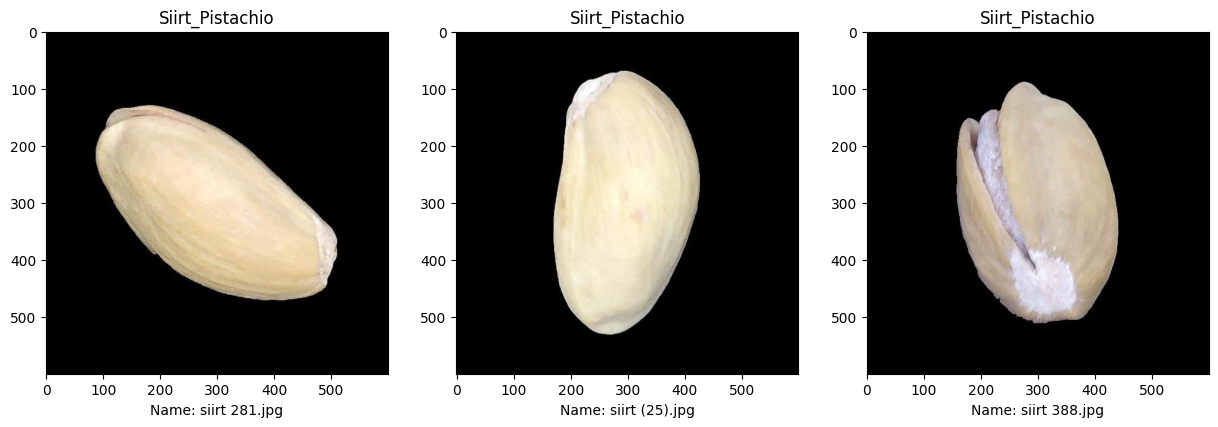

In [43]:
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

Image Augumentation

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range = 0.5,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_val_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [45]:
train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    batch_size=batch,
                                                    class_mode="categorical",
                                                    target_size=(img_size,img_size)
                                                    )
va_generator = test_val_datagen.flow_from_directory(directory=val_path,
                                                      batch_size=batch,
                                                      class_mode="categorical",
                                                      target_size=(img_size,img_size)
                                                      )
test_generator = test_val_datagen.flow_from_directory(directory = test_path,
                                                    batch_size = batch,
                                                    class_mode = "categorical",
                                                    target_size = (img_size,img_size)
                                                    )

Found 1717 images belonging to 2 classes.
Found 214 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


In [48]:
data_train = image_dataset_from_directory(
    data_dir,
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=0,
    color_mode="rgb",
    image_size=(img_size,img_size),
    batch_size=32,
)
data_test = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    seed=0,
    color_mode="rgb",
    image_size=(img_size,img_size),
    batch_size=32,
)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Found 2148 files belonging to 2 classes.
Using 429 files for validation.


In [49]:
# small train dataset with BATCH_SIZE*SMALL_DATASET_BATCHES images
train_data_small = data_train.take(5)

Modelling

In [52]:
base_model = VGG16(weights='imagenet',include_top=False,
                   input_shape=(img_size,img_size,3))

base_model.trainable =False

#add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096,activation='relu')(x)
x = Dense(4096,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2096,activation="relu")(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

Visual Representation of the model layers

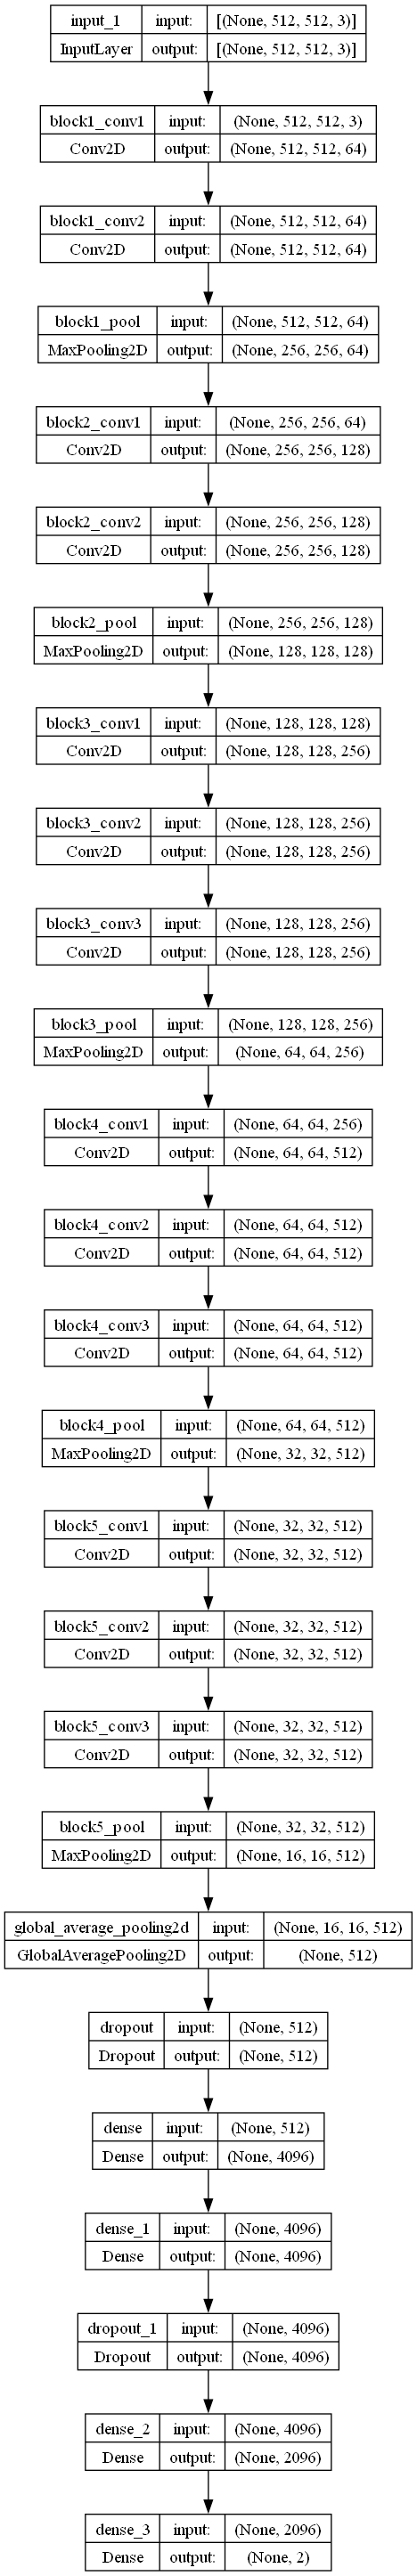

In [54]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

Callback to continually monitor the validation loss and stop the training of model when it overfits

In [55]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

In [58]:
opt = Adam(learning_rate=0.005)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

Training a model

Reason for 50 epochs is that if the model begins to overfit or the validation loss does not decrease much then callback will automatically stop the training

In [ ]:
history=model.fit(data_train,
                  epochs=50,
                  validation_data=data_test,
                  validation_steps=int(0.1 * len(data_test)),
                  verbose=1,
                  callbacks=callbacks)